In [1]:
import glob
from astropy.coordinates import get_icrs_coordinates,SkyCoord
from astropy.io import fits
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as mplpp
import numpy as np
import pylab as pl

In [2]:
def load_event_data():
    f = fits.open('vela_bueno.fits')
    ra = f['events'].data.field('ra')
    dec = f['events'].data.field('dec')
    en = f['events'].data.field('energy')
    #ph = f['events'].data.field('pulse_phase')
    ph = None
    f.close()
    return ra,dec,en,ph

In [3]:
def met2mjd(times,mjdref=51910+7.428703703703703e-4):
    times = np.asarray(times,dtype=np.float64)
    return times*(1./86400)+mjdref

In [4]:
def make_counts_map(mask,onpulse=True):
    #ra,dec,en,ph,ti = load_event_data()
    mjd = met2mjd(ti)
    if onpulse:
        mask &= (ph > 0.09) & (ph < 0.64) & (mjd < 58487)
    else: 
        mask &= ((ph < 0.09) | (ph > 0.64)) & (mjd < 58487)
        
    c = SkyCoord(ra[mask]*u.deg,dec[mask]*u.deg,frame='icrs')
    c0 = SkyCoord(ra0*u.deg,dec0*u.deg)
    gal = c.galactic
    gal_b = gal.b.value
    gal_l = gal.l.value
    b0 = c0.galactic.b.value
    l0 = c0.galactic.l.value
    l_bins = np.linspace(l0-5,l0+5,41)
    b_bins = np.linspace(b0-5,b0+5,41)
    # plot sky map
    vmin = 25
    vmax = 1e4 if onpulse else 5e2
    pl.figure(1 if onpulse else 3); pl.clf()
    pl.hist2d(gal_l,gal_b,bins=[l_bins,b_bins],norm=mpl.colors.LogNorm(),cmin=vmin,cmax=vmax);
    pl.xlabel('Longitud galáctica')
    pl.ylabel('Latitud galáctica')
    pl.colorbar()
    #plot longitude slice around b=-3
    pl.figure(2 if onpulse else 4);pl.clf()
    mask = np.abs(gal_b - (-3.15)) < 0.5
    pl.gca().set_yscale('log')
    l_bins = np.linspace(l0-5,l0+5,101)
    pl.hist(gal_l[mask],bins=l_bins)
    pl.xlabel('Longitud galáctica')
    pl.ylabel('Cuentas por intervalo')
    
    #norm=mpl.colors.LogNorm(),vmin=50,vmax=1e4
    #norm=simple_norm(min_cut=minv, max_cut=maxv),

In [5]:
def plot_pulse_profile():
    #ph = None
    mjd = met2mjd(ti)
    mask = en > 1000
    pl.figure(5); pl.clf()
    pl.hist(ph[mask],bins=np.linspace(0,1,201),histtype='step');
    pl.xlabel('Fase del pulso de Vela')
    pl.ylabel('Cuentas de Vela por intervalo')
    pl.xlim(0,1)
    #pl.axis([0,1,0,30000])
    pl.figure(6); pl.clf()
    pl.hist2d(mjd[mask],ph[mask],bins=[5000,100])
    pl.axvline(58487,color='C3',ls='--')
    pl.xlabel('Modified Julian Date')
    pl.ylabel('Vela Pulse Phase')
    pl.ylim(0,1)

In [6]:
f = fits.open('vela_bueno.fits')
ra = f['events'].data.field('ra')
dec = f['events'].data.field('dec')
en = f['events'].data.field('energy')
ph = f['events'].data.field('pulse_phase')
ti = f['events'].data.field('time')
f.close()

In [7]:
vela_coords = get_icrs_coordinates('PSR J0835-4510')
ra0 = vela_coords.ra.value
dec0 = vela_coords.dec.value

In [8]:
mask2 = en > 100
mask23 = (en < 1000) & (en > 100)
mask34 = (en < 10000) & (en > 1000)
mask3 = en > 1000
mask4 = en > 10000

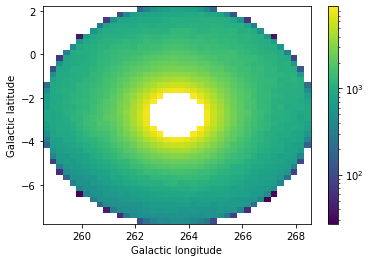

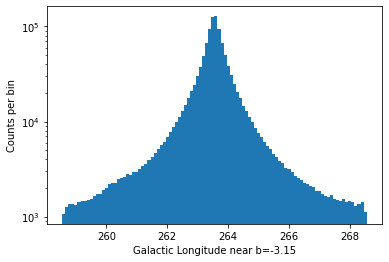

In [9]:
make_counts_map(mask2,onpulse=True)

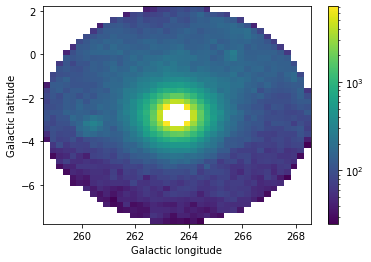

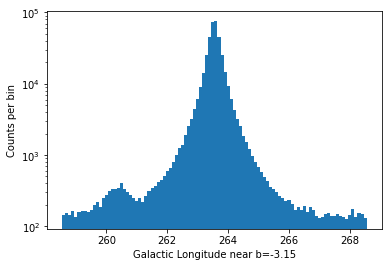

In [10]:
make_counts_map(mask3,onpulse=True)

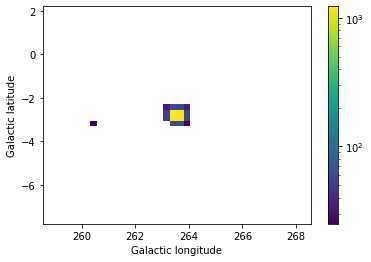

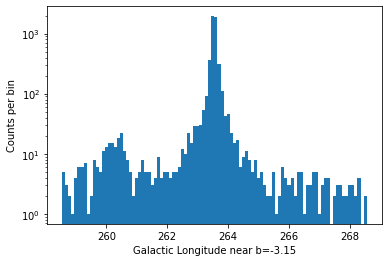

In [11]:
make_counts_map(mask4,onpulse=True)

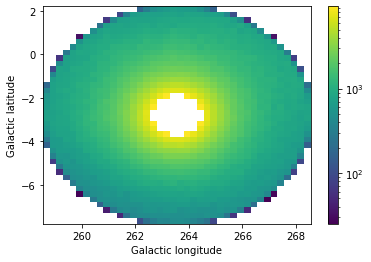

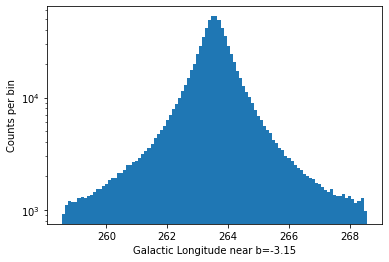

In [12]:
make_counts_map(mask23,onpulse=True)

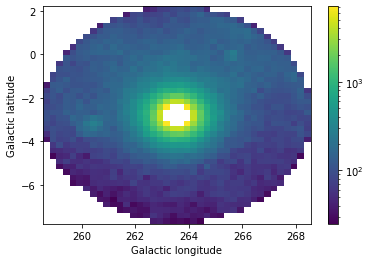

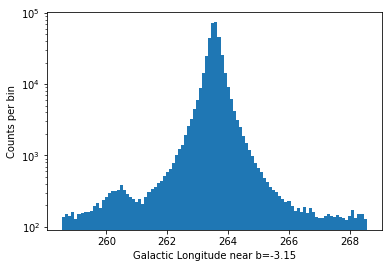

In [13]:
make_counts_map(mask34,onpulse=True)

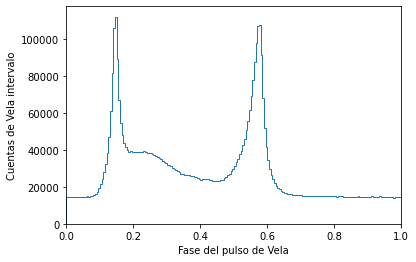

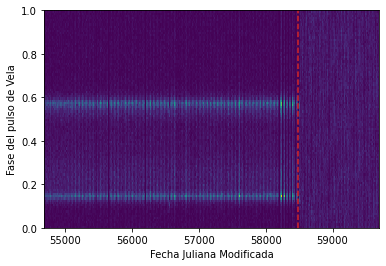

In [19]:
def plot_pulse_profile_2():
    #ph = None
    mjd = met2mjd(ti)
    mask = en > 100
    
    pl.figure(5); pl.clf()
    pl.hist(ph[mask],bins=np.linspace(0,1,201),histtype='step');
    pl.xlabel('Fase del pulso de Vela')
    pl.ylabel('Cuentas de Vela intervalo')
    pl.xlim(0,1)

    pl.figure(6); pl.clf()
    pl.hist2d(mjd[mask],ph[mask],bins=[5000,100])
    pl.axvline(58487,color='C3',ls='--')
    pl.xlabel('Fecha Juliana Modificada')
    pl.ylabel('Fase del pulso de Vela')
    pl.ylim(0,1)

plot_pulse_profile_2()

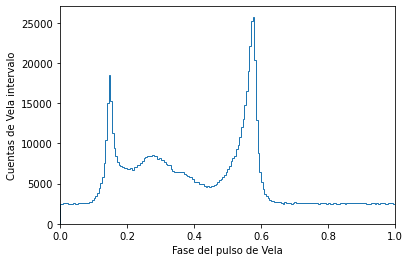

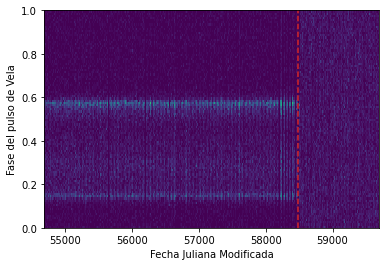

In [21]:
def plot_pulse_profile_3():
    #ph = None
    mjd = met2mjd(ti)
    mask = en > 1000
    
    pl.figure(5); pl.clf()
    pl.hist(ph[mask],bins=np.linspace(0,1,201),histtype='step');
    pl.xlabel('Fase del pulso de Vela')
    pl.ylabel('Cuentas de Vela intervalo')
    pl.xlim(0,1)

    pl.figure(6); pl.clf()
    pl.hist2d(mjd[mask],ph[mask],bins=[5000,100])
    pl.axvline(58487,color='C3',ls='--')
    pl.xlabel('Fecha Juliana Modificada')
    pl.ylabel('Fase del pulso de Vela')
    pl.ylim(0,1)

plot_pulse_profile_3()

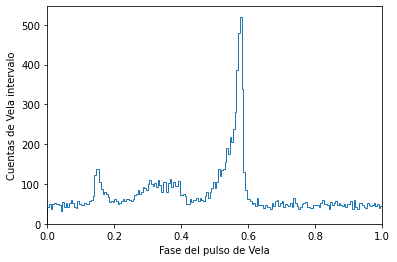

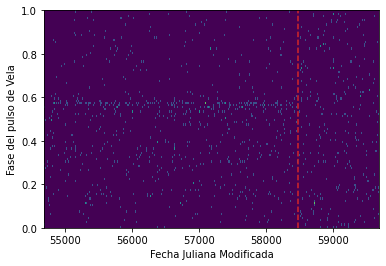

In [22]:
def plot_pulse_profile_4():
    #ph = None
    mjd = met2mjd(ti)
    mask = en > 10000
    pl.figure(5); pl.clf()
    pl.hist(ph[mask],bins=np.linspace(0,1,201),histtype='step');
    pl.xlabel('Fase del pulso de Vela')
    pl.ylabel('Cuentas de Vela intervalo')
    pl.xlim(0,1)

    pl.figure(6); pl.clf()
    pl.hist2d(mjd[mask],ph[mask],bins=[5000,100])
    pl.axvline(58487,color='C3',ls='--')
    pl.xlabel('Fecha Juliana Modificada')
    pl.ylabel('Fase del pulso de Vela')
    pl.ylim(0,1)

plot_pulse_profile_4()

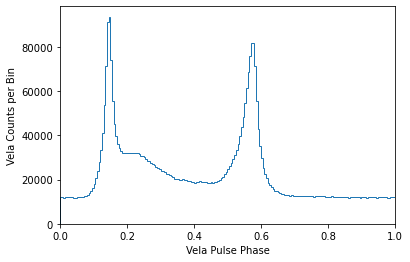

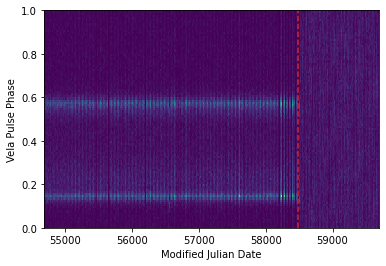

In [17]:
def plot_pulse_profile_23():
    #ph = None
    mjd = met2mjd(ti)
    mask = (en < 1000) & (en > 100)
    pl.figure(5); pl.clf()
    pl.hist(ph[mask],bins=np.linspace(0,1,201),histtype='step');
    pl.xlabel('Fase del pulso de Vela')
    pl.ylabel('Cuentas de Vela intervalo')
    pl.xlim(0,1)

    pl.figure(6); pl.clf()
    pl.hist2d(mjd[mask],ph[mask],bins=[5000,100])
    pl.axvline(58487,color='C3',ls='--')
    pl.xlabel('Fecha Juliana Modificada')
    pl.ylabel('Fase del pulso de Vela')
    pl.ylim(0,1)

plot_pulse_profile_23()

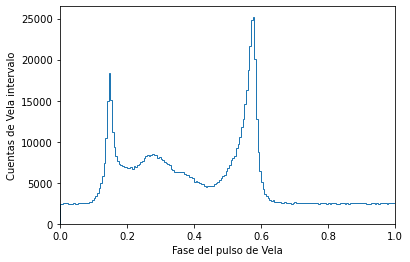

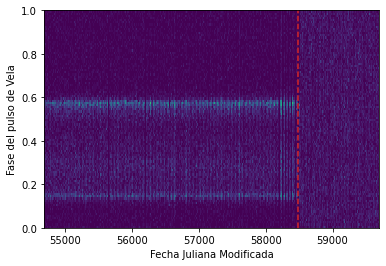

In [23]:
def plot_pulse_profile_34():
    #ph = None
    mjd = met2mjd(ti)
    mask = (en < 10000) & (en > 1000)
    pl.figure(5); pl.clf()
    pl.hist(ph[mask],bins=np.linspace(0,1,201),histtype='step');
    pl.xlabel('Fase del pulso de Vela')
    pl.ylabel('Cuentas de Vela intervalo')
    pl.xlim(0,1)

    pl.figure(6); pl.clf()
    pl.hist2d(mjd[mask],ph[mask],bins=[5000,100])
    pl.axvline(58487,color='C3',ls='--')
    pl.xlabel('Fecha Juliana Modificada')
    pl.ylabel('Fase del pulso de Vela')
    pl.ylim(0,1)

plot_pulse_profile_34()